In [145]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
#loading csv
car_prices = pd.read_csv("C:\\Users\\Vittorio\\Documents\\Jupyter projects\\Assignments\\7 Project\\car_prices.csv")


car_prices

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [147]:
#checking basic info
car_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [148]:
#DATA CLEANING

#Looking for missing values
miss_values = car_prices.isnull().sum()
miss_values

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [149]:
#checking for duplicates...
duplicates = car_prices.duplicated().sum()
duplicates
print(f'There are {duplicates} duplicates present in the dataframe.')

There are 0 duplicates present in the dataframe.


In [150]:
#Dropping rows where my specified columns have no values...
pre_cleaning_rows = car_prices.shape[0]
car_prices = car_prices.dropna(subset=['saledate', 'transmission', 'mmr', 'sellingprice', 'vin', 'make', 'model', 'trim', 'body', 'condition', 'odometer', 'color', 'interior', 'seller'])
post_cleaning_rows = car_prices.shape[0]

rows_dropped = pre_cleaning_rows - post_cleaning_rows


print(f'{rows_dropped} rows with null key values have been dropped.')

86512 rows with null key values have been dropped.


In [151]:

#converting year column from int64 to datetime
car_prices['year'] = pd.to_datetime(car_prices['year'], format='%Y')
#Extracting the 4 digits for the year
car_prices['year'] = car_prices['year'].dt.year

car_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int32  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int32(1), object(11)
memory usage: 59.5+ MB


C:\Users\Vittorio\AppData\Local\Temp\ipykernel_8708\688187876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices['year'] = pd.to_datetime(car_prices['year'], format='%Y')
C:\Users\Vittorio\AppData\Local\Temp\ipykernel_8708\688187876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices['year'] = car_prices['year'].dt.year


In [152]:
car_prices

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [153]:
#Total number of automatic trasmissions cars sold
automatic_transmissions = car_prices[car_prices['transmission'] == 'automatic']
count_automatic_transmissions = automatic_transmissions.shape[0]

count_automatic_transmissions

print(f'A number of {count_automatic_transmissions} have been sold with an automatic trasmission.')

A number of 455963 have been sold with an automatic trasmission.


In [154]:
#Reviewing automatic_transmissions so far...
automatic_transmissions['sellingprice'].describe()

count    455963.000000
mean      13774.510142
std        9579.280941
min           1.000000
25%        7350.000000
50%       12300.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

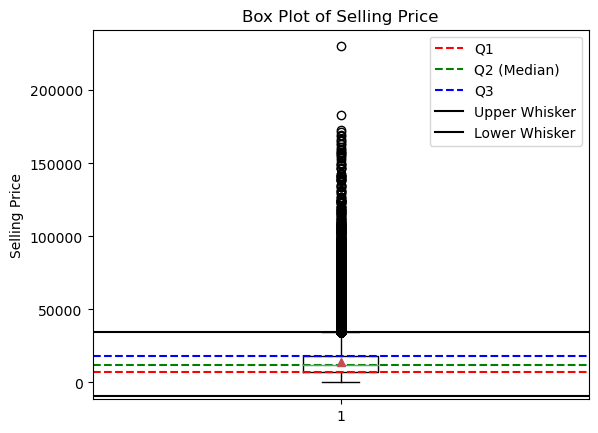

In [155]:
#Automatic Transmission scanning for outliers

# Calculate quartiles
automatic_transmissions_q1 = automatic_transmissions['sellingprice'].quantile(0.25)
automatic_transmissions_q2 = automatic_transmissions['sellingprice'].quantile(0.50)
automatic_transmissions_q3 = automatic_transmissions['sellingprice'].quantile(0.75)
automatic_transmissions_iqr = automatic_transmissions_q3 - automatic_transmissions_q1

#Whiskers
automatic_transmissions_upper_bound = automatic_transmissions_q3 + (1.5*automatic_transmissions_iqr)
automatic_transmissions_lower_bound = automatic_transmissions_q1 - (1.5*automatic_transmissions_iqr)

automatic_transmissions_data = automatic_transmissions['sellingprice']

# Create a boxplot
plt.boxplot(automatic_transmissions_data, showmeans=True)

# Add quartile lines
plt.axhline(automatic_transmissions_q1, color='r', linestyle='--', label='Q1')
plt.axhline(automatic_transmissions_q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axhline(automatic_transmissions_q3, color='b', linestyle='--', label='Q3')

# Add whiskers
plt.axhline(automatic_transmissions_upper_bound, color='black', linestyle='-', label='Upper Whisker')
plt.axhline(automatic_transmissions_lower_bound, color='black', linestyle='-', label='Lower Whisker')

# Add title and labels
plt.title('Box Plot of Selling Price')
plt.ylabel('Selling Price')
plt.legend()

# Show the plot
plt.show()


In [156]:
automatic_transmissions_upper_bound

34475.0

In [157]:
# Record the number of rows before cleaning
automatic_transmissions_pre_cleaning_rows = automatic_transmissions.shape[0]

# Drop rows based on condition using .loc
automatic_transmissions = automatic_transmissions.loc[
    (automatic_transmissions['sellingprice'] <= 34475) & 
    (automatic_transmissions['sellingprice'] >= 100)
]

# Record the number of rows after cleaning
automatic_transmissions_post_cleaning_rows = automatic_transmissions.shape[0]

# Calculate the outcome of cleaning
automatic_transmissions_cleaning_outcome = automatic_transmissions_pre_cleaning_rows - automatic_transmissions_post_cleaning_rows

# Print the number of rows dropped and the total outcome of cleaning
print("Rows Dropped:", automatic_transmissions_cleaning_outcome)
print("Total Automatic Transmissions After Cleaning:", automatic_transmissions_post_cleaning_rows)

Rows Dropped: 14135
Total Automatic Transmissions After Cleaning: 441828


In [158]:
#Total number of manual trasmissions cars sold
manual_transmission = car_prices[car_prices['transmission'] == 'manual']
count_manual_transmission = manual_transmission.shape[0]

count_manual_transmission

print(f'A number of {count_manual_transmission} have been sold with a manual transmission.')


A number of 16362 have been sold with a manual transmission.


In [159]:
#Reviewing manual transmission
manual_transmission.describe()

,year,condition,odometer,mmr,sellingprice
count,16362.000000,16362.000000,16362.000000,16362.000000,16362.000000
mean,2008.406613,29.351424,75539.902824,11635.859003,11349.721305
std,4.503446,13.539560,57125.212265,10116.579930,10236.848516
min,1990.000000,1.000000,1.000000,25.000000,150.000000
25%,2005.000000,21.000000,28939.500000,4300.000000,3900.000000
50%,2009.000000,32.000000,64830.000000,9350.000000,8900.000000
75%,2012.000000,41.000000,109636.500000,16000.000000,15800.000000
max,2015.000000,49.000000,999999.000000,107000.000000,105000.000000


In [185]:

#Groupby year
automatic_transmissions_per_year = automatic_transmissions.groupby('year').count()

#filtering year and sale date to reflect the number of sales 
automatic_transmissions_per_year = automatic_transmissions_per_year.filter(items = ['year', 'saledate'])
#renaming column
automatic_transmissions_per_year.rename(columns={'saledate':'Number of sales of automatics'}, inplace=True)
automatic_transmissions_per_year



,Number of sales of automatics
year,
1990,25
1991,46
1992,87
1993,111
1994,249
1995,437
1996,493
1997,926
1998,1332


In [161]:
#Groupby year
manual_transmission_per_year = manual_transmission.groupby('year').count()
#filtering year and sale date to reflect the number of sales 
manual_transmission_per_year = manual_transmission_per_year.filter(items = ['year', 'saledate'])
#renaming column
manual_transmission_per_year.rename(columns={'saledate':'number of sales of manuals'}, inplace=True)
manual_transmission_per_year



,number of sales of manuals
year,
1990,8
1991,5
1992,10
1993,16
1994,37
1995,46
1996,69
1997,116
1998,132


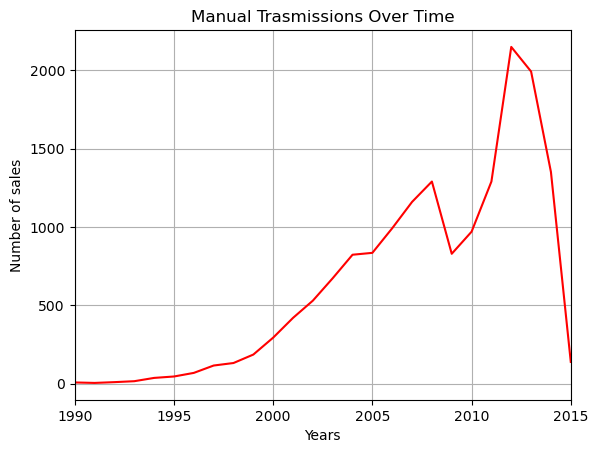

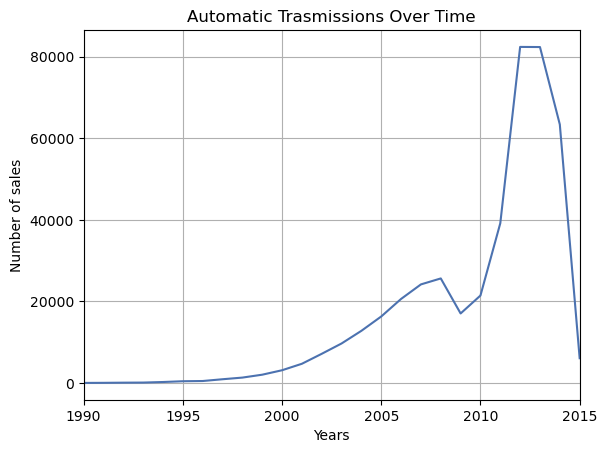

In [167]:
#resetting index in order to have the column working in the chart
manual_transmissions_per_year_reset = manual_transmission_per_year.reset_index()

plt.plot(manual_transmissions_per_year_reset["year"], manual_transmissions_per_year_reset["number of sales of manuals"], color='red')
plt.style.use('seaborn-v0_8-deep')
plt.xlabel("Years")
plt.ylabel("Number of sales")
plt.title("Manual Trasmissions Over Time")
plt.xlim(1990, 2015) 
plt.grid(True)
#save the chart
plt.savefig('charts/manual_transmissions_over_time.png')
plt.show()


#resetting index in order to have the column working in the chart
automatic_transmissions_per_year_reset = automatic_transmissions_per_year.reset_index()

plt.plot(automatic_transmissions_per_year_reset["year"], automatic_transmissions_per_year_reset["Number of sales of automatics"])
plt.xlabel("Years")
plt.ylabel("Number of sales")
plt.title("Automatic Trasmissions Over Time")
plt.xlim(1990, 2015) 
plt.grid(True)
#save the chart
plt.savefig('charts/automatic_transmissions_over_time.png')
plt.show()


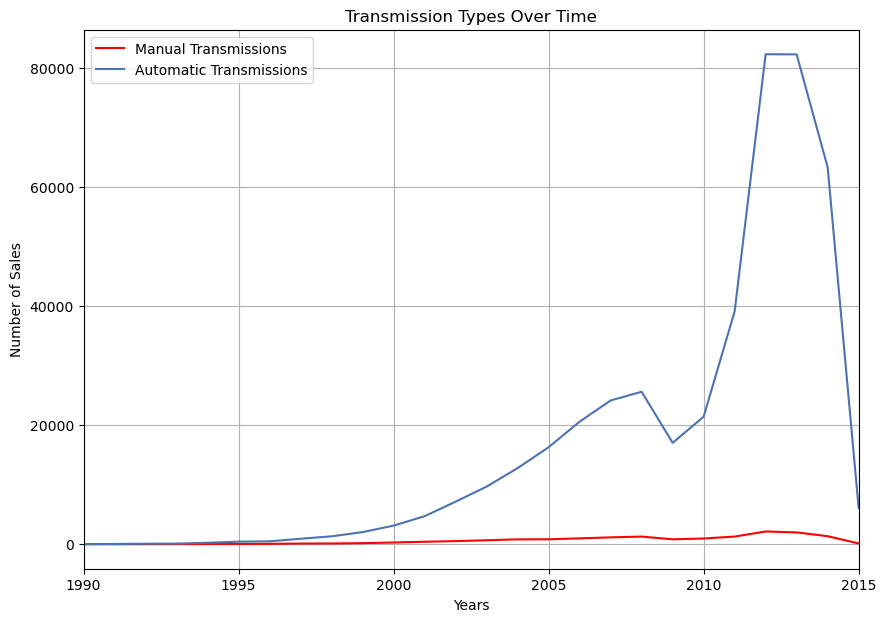

In [168]:
plt.figure(figsize=(10, 7)) 

# Plot both sets of data on the same chart
plt.plot(manual_transmissions_per_year_reset["year"], manual_transmissions_per_year_reset["number of sales of manuals"], label="Manual Transmissions", color='red')
plt.plot(automatic_transmissions_per_year_reset["year"], automatic_transmissions_per_year_reset["Number of sales of automatics"], label="Automatic Transmissions")
plt.style.use('fast')

# Add labels and title
plt.xlabel("Years")
plt.ylabel("Number of Sales")
plt.title("Transmission Types Over Time")

# Add a legend
plt.legend()

plt.grid(True)

plt.xlim(1990, 2015) 

#save the chart
plt.savefig('charts/transmissions_type_over_time.png')
# Display the plot
plt.show()


In [169]:
#PRICES 

#AUTOMATIC stats

automatic_transmissions_prices = automatic_transmissions.groupby('transmission').agg({'sellingprice': ['mean', 'max', 'count', 'min', 'std']})
automatic_transmissions_prices

sellingprice                                     
                      mean      max   count    min          std
transmission                                                   
automatic     12787.901468  34450.0  441828  100.0  7579.013275

In [170]:
#Manual stats

manual_transmissions_prices = manual_transmission.groupby('transmission').agg({'sellingprice': ['mean', 'max', 'count', 'min', 'std']})
manual_transmissions_prices


sellingprice                                      
                      mean       max  count    min           std
transmission                                                    
manual        11349.721305  105000.0  16362  150.0  10236.848516

In [184]:
#highest increase of sales for automatics
automatic_highest_sale = automatic_transmissions_per_year['Number of sales of automatics'].max()
automatic_highest_sale_year = automatic_transmissions_per_year['Number of sales of automatics'].idxmax()
print(f'The highest increase in number of sales was {automatic_highest_sale} on the year {automatic_highest_sale_year}.')

The highest increase in number of sales was 82378 on the year 2012.


In [188]:
#highest increase of sales for manual
manual_highest_sale = manual_transmission_per_year['number of sales of manuals'].max()
manual_highest_sale_year = manual_transmission_per_year['number of sales of manuals'].idxmax()
print(f'The highest increase in number of sales was {manual_highest_sale} on the year {manual_highest_sale_year}.')

The highest increase in number of sales was 2149 on the year 2012.


KeyError: 'Number of sales of automatics'